In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon



In [2]:
class Queue:
    def __init__(self, mu):
        self.mu = mu
        self.customers = []
        self.total_waiting_time = 0

    def add_customer(self, arrival_time):
        if len(self.customers) == 0:
            service_time = np.random.exponential(1 / self.mu)
            departure_time = arrival_time + service_time
        else:
            service_time = np.random.exponential(1 / self.mu)
            last_departure_time = max(self.customers[-1][1], arrival_time)
            departure_time = last_departure_time + service_time
        self.customers.append((arrival_time, departure_time))
        self.total_waiting_time += departure_time - arrival_time

    def get_number_of_customers(self):
        return len(self.customers)

    def get_total_waiting_time(self):
        return self.total_waiting_time

def simulate(m, mu, lambd, policy, N):
    queues = [Queue(mu) for _ in range(m)]
    arrivals = np.random.exponential(1 / lambd, N)
    total_waiting_times = []
    i=0
    for arrival_time in np.cumsum(arrivals):
        if policy == 'join-the-shortest-queue':#SQ
            queue_lengths = [q.get_number_of_customers() for q in queues]
            shortest_queue_index = np.argmin(queue_lengths)
            queues[shortest_queue_index].add_customer(arrival_time)
        elif policy == 'power-of-two-choices':#P2c
            i, j = np.random.choice(m, 2, replace=False)
            queue_i = queues[i].get_number_of_customers()
            queue_j = queues[j].get_number_of_customers()
            if queue_i <= queue_j:
                queues[i].add_customer(arrival_time)
            else:
                queues[j].add_customer(arrival_time)
        elif policy == 'uniform-random':
            i = np.random.choice(m)
            queues[i].add_customer(arrival_time)

        #total waiting time for customer
        total_waiting_times.append(queues[i].get_total_waiting_time() - arrival_time)

    # average CCDF over K runs
    return total_waiting_times

def calculate_ccdf(waiting_times):#CCDF FUNCCCCC
    sorted_times = np.sort(waiting_times)
    ccdf = np.arange(len(sorted_times), 0, -1) / len(sorted_times)
    return sorted_times, ccdf

def plot_ccdfs(lambdas, policies, mu, m, N, K):
    plt.figure(figsize=(12, 8))

    for lambd in lambdas:
        for policy in policies:
            all_waiting_times = []
            for _ in range(K):
                waiting_times = simulate(m, mu, lambd, policy, N)
                all_waiting_times.extend(waiting_times)

            sorted_times, ccdf = calculate_ccdf(all_waiting_times)
            plt.step(sorted_times, ccdf, where='post', label=f'λ={lambd}, {policy}')

            # Add theoretical line for uniform-random policy
            if policy == 'uniform-random':
                rate = mu - lambd / m
                theoretical_ccdf = 1 - expon.cdf(sorted_times, scale=1/rate)
                plt.plot(sorted_times, theoretical_ccdf, '--', label=f'Theoretical λ={lambd}, {policy}')

    plt.yscale('log')
    plt.xlabel('Waiting time')
    plt.ylabel('CCDF')
    plt.title('CCDFs of Total Waiting Time under Different Policies')
    plt.legend()
    plt.grid(True)
    plt.show()
#MAIN()
# Parameters


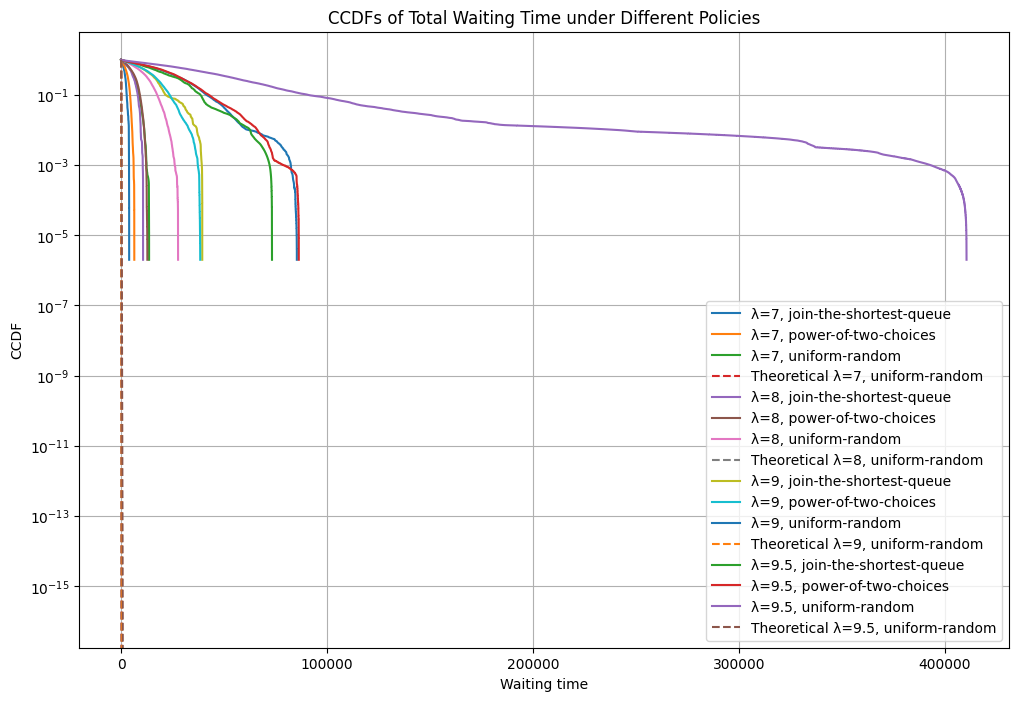

In [3]:
m = 10  # Number of queues
mu = 1  # Service rate
N = 50000  # Total number of arrivals
K = 10  # Number of  runs
lambdas = [7, 8, 9, 9.5]  # Arrival rates
policies = ['join-the-shortest-queue', 'power-of-two-choices', 'uniform-random']

# Run the sim
plot_ccdfs(lambdas, policies, mu, m, N, K)